In [1]:
import sys, os
import numpy as np

In [2]:
parent_dir = os.path.abspath(os.pardir)
libpath = os.path.join(parent_dir, 'c3dp_source')
outpath = os.path.join(parent_dir, 'out')
beampath = os.path.join(parent_dir, 'beam')
if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [3]:
import optimization_mantidReduction as opt
from c3dp.instrument.sampleassembly import makeSAXML

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *


In [4]:
#making sample assembly note
sample_assembly_fileName = 'clampCell_WithSi_NoCollimator'

In [5]:
cell=opt.PresureCell()
cell.parameters(Snap_angle=False, coll_sim=False,ncount=1e9,source_file='Neutrons_mcvine.dat', 
                sampleassembly_fileName=sample_assembly_fileName, sourceTosample_z=0.02)

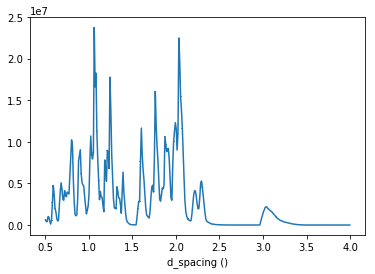

In [6]:
diffraction_pattern_Si = cell.diffraction_pattern_calculation ()

In [7]:
neutron_file_path = os.path.join(outpath, '{}'.format(sample_assembly_fileName))
neutron_file= os.path.join(neutron_file_path, '{}.mcvine'.format(sample_assembly_fileName))

In [8]:
neutron_file

'/home/fi0/Collimator_3D/c3dp/out/clampCell_WithSi_NoCollimator/clampCell_WithSi_NoCollimator.mcvine'

In [9]:
!mv  {neutron_file} {beampath}

In [5]:
source = sample_assembly_fileName
sample_assembly_fileName_coll = 'collimator_plastic'
coll=opt.PresureCell()
coll.parameters(Snap_angle=True, coll_sim=True,ncount=1e9,source_file='{}.mcvine'.format(source),
                sampleassembly_fileName=sample_assembly_fileName_coll, masking=True)

('coll height at detector side: ', 100.18675256593274)
('coll width at detector side: ', 100.18675256593274)
('number channels in vertical direction: ', 18)
('number channels in horizontal direction: ', 18)


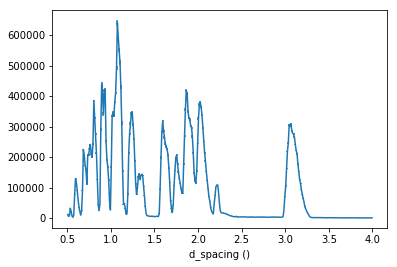

('coll_len,:', 48.06149789885234, 'focal_distance,:', 72.16260518026694, 'collimator_performance: ', 0.6429975182741245)
('coll height at detector side: ', 61.32100555423708)
('coll width at detector side: ', 61.32100555423708)
('number channels in vertical direction: ', 13)
('number channels in horizontal direction: ', 13)


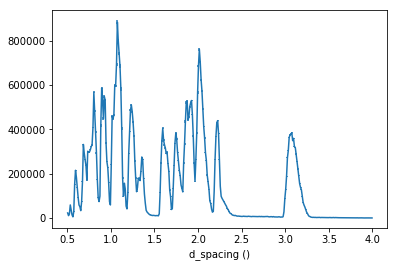

('coll_len,:', 21.532566347957072, 'focal_distance,:', 52.05264031712743, 'collimator_performance: ', 0.5514912092515565)
('coll height at detector side: ', 117.20192141214422)
('coll width at detector side: ', 117.20192141214422)
('number channels in vertical direction: ', 12)
('number channels in horizontal direction: ', 12)


In [ ]:
params_bounds = [(20,165), (17,100)]
coll.optimize(params_bounds)